# Praktikum Minggu 12 PCVK
* Nama: Aido Luthfi Al Hakim
* Kelas: 3A TI
* NIM: 2141720136
* Absen: 06


Kelompok:
- Aido Lutfhi AL Hakim | 2141720136
- Jauhar Maulana A'la | 2141720186
- Naufal Falah Wafiuddin | 2141720129

Link GitHub : https://github.com/luthf-ai/seni_komputer


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load image
image_names = ['jokowi.jpg', 'kartini.jpg', 'mycat.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']
images = [cv.imread('Face Detection/'+name) for name in image_names]

Number of faces detected: 1


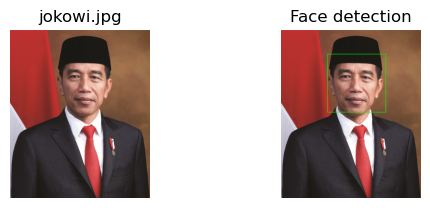

Number of faces detected: 1


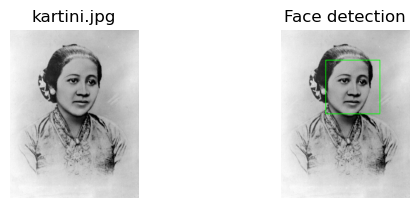

Number of faces detected: 0


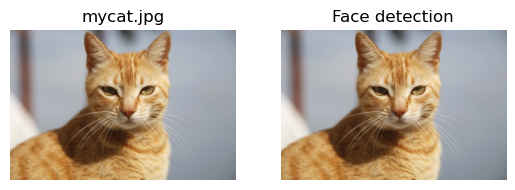

Number of faces detected: 5


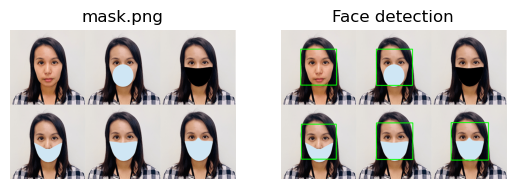

Number of faces detected: 1


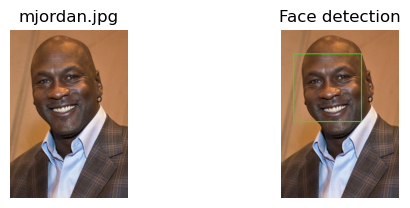

Number of faces detected: 28


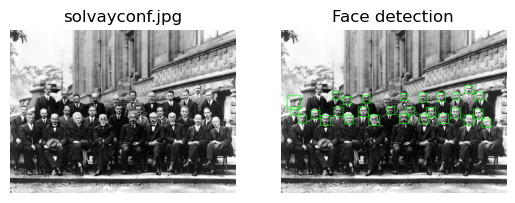

In [4]:
# Face detection
face_cascade = cv.CascadeClassifier('Face Detection/haarcascade_frontalface_alt.xml')
for i in range(len(images)):
    gray = cv.cvtColor(images[i], cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    output = images[i].copy()
    print('Number of faces detected:', len(faces))
    for (x,y,w,h) in faces:
        cv.rectangle(output, (x,y), (x+w,y+h), (0,255,0), 2)
    plt.subplot(2,2,1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title(image_names[i])
    plt.axis('off')
    plt.subplot(2,2,2)
    plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
    plt.title('Face detection')
    plt.axis('off')
    plt.show()

Number of cats detected: 1


(-0.5, 599.5, 399.5, -0.5)

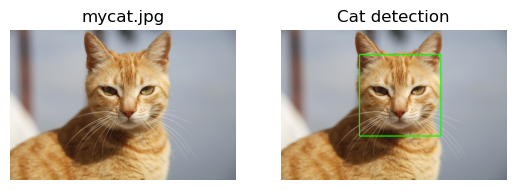

In [5]:
cat_cascade = cv.CascadeClassifier('Face Detection/haarcascade_frontalcatface.xml')
gray = cv.cvtColor(images[2], cv.COLOR_BGR2GRAY)
output = images[2].copy()
cats = cat_cascade.detectMultiScale(gray, 3, 5)
print('Number of cats detected:', len(cats))
for (x,y,w,h) in cats:
    cv.rectangle(output, (x,y), (x+w,y+h), (0,255,0), 2)
plt.subplot(2,2,1)
plt.imshow(cv.cvtColor(images[2], cv.COLOR_BGR2RGB))
plt.title(image_names[2])
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.title('Cat detection')
plt.axis('off')

Number of eyes detected: 2


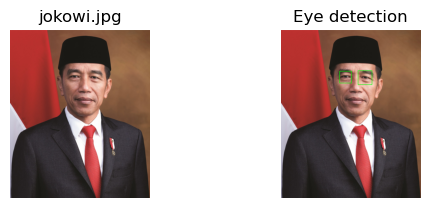

In [6]:
eye_cascade = cv.CascadeClassifier('Face Detection/haarcascade_eye.xml')
jokowi = images[0].copy()
gray = cv.cvtColor(jokowi, cv.COLOR_BGR2GRAY)
output = jokowi.copy()
eyes = eye_cascade.detectMultiScale(gray, 1.1, 5)
print('Number of eyes detected:', len(eyes))
for (x,y,w,h) in eyes:
    cv.rectangle(output, (x,y), (x+w,y+h), (0,255,0), 2)
plt.subplot(2,2,3)
plt.imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2RGB))
plt.title(image_names[0])
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.title('Eye detection')
plt.axis('off')
plt.show()

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

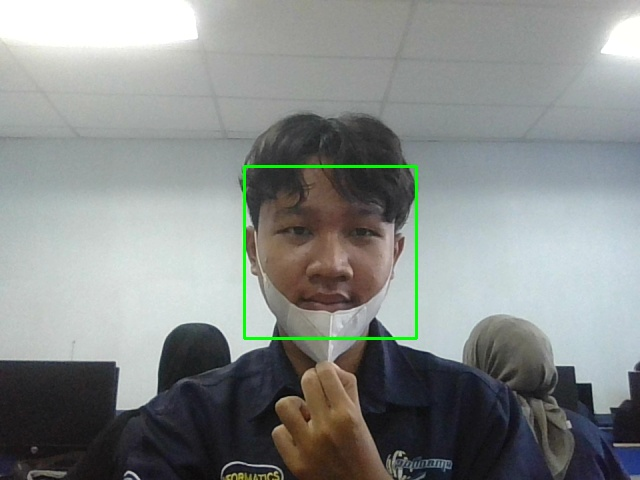

KeyboardInterrupt: 

In [11]:
from IPython.display import display, Image
import ipywidgets as widgets
import threading

stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square' # (FontAwesome names without the `fa-` prefix)
)

cap = cv.VideoCapture(0)
# while True:
#     ret, frame = cap.read()
#     gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray)
#     output = frame.copy()
#     for (x,y,w,h) in faces:
#         cv.rectangle(output, (x,y), (x+w,y+h), (0,255,0), 2)
#     cv.imshow('Face detection', output)
#     if cv.waitKey(1) & 0xFF == ord('q'):
#         break

def view(button):
    display_handle=display(None, display_id=True)
    i = 0
    while True:
        _, frame = cap.read()
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray)
        output = frame.copy()
        for (x,y,w,h) in faces:
            cv.rectangle(output, (x,y), (x+w,y+h), (0,255,0), 2)
        _, frame = cv.imencode('.jpeg', output)
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)
display(stopButton)
view(stopButton)
# thread = threading.Thread(target=view, args=(stopButton,))
# thread.start()


Number of faces detected: 1


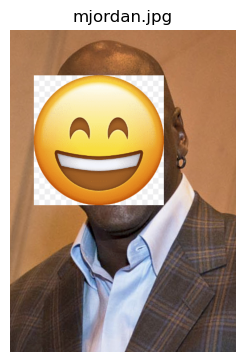

In [8]:
mjordan = images[4].copy()
gray = cv.cvtColor(mjordan, cv.COLOR_BGR2GRAY)
output = mjordan.copy()
face = face_cascade.detectMultiScale(gray)
print('Number of faces detected:', len(face))
for (x,y,w,h) in face:
    smile = cv.imread('Face Detection/smile.png')
    smile = cv.resize(smile, (w,h))
    output[y:y+h, x:x+w] = smile
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.title(image_names[4])
plt.axis('off')
plt.show()

In [ ]:
eye_cascade = cv.CascadeClassifier('Face Detection/haarcascade_eye.xml')
righteye_cascade = cv.CascadeClassifier('Face Detection/haarcascade_righteye_2splits.xml')
peoples = cv.imread('Face Detection/people.jpg')
face = face_cascade.detectMultiScale(peoples, 1.02, 10)
print('Number of faces detected:', len(face))
for (x,y,w,h) in face:
    eyes = eye_cascade.detectMultiScale(peoples[y:y+h, x:x+w], 1.03, 15)
    righteyes = righteye_cascade.detectMultiScale(peoples[y:y+h, x:x+w], 1.01, 10)

    for (x1,y1,w1,h1) in eyes:
        cv.rectangle(peoples, (x+x1,y+y1), (x+x1+w1,y+y1+h1), (255,255,255), 1)
    for (x1,y1,w1,h1) in righteyes:
        cv.rectangle(peoples, (x+x1,y+y1), (x+x1+w1,y+y1+h1), (0,0,255), 2)
    
    cv.rectangle(peoples, (x,y), (x+w,y+h), (0,0,0), 1)

    

plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(peoples, cv.COLOR_BGR2RGB))
plt.title('People')
plt.axis('off')
plt.show()

error: OpenCV(4.8.1) /io/opencv/modules/objdetect/src/cascadedetect.hpp:46: error: (-215:Assertion failed) 0 <= scaleIdx && scaleIdx < (int)scaleData->size() in function 'getScaleData'
